# UConn Football Prospect Analysis

In [1]:
import pandas as pd
import numpy as np

combine = pd.read_csv("data/ZBK Data - National Combine.csv")
NFL = pd.read_csv("data/NationalAndNFLCombinePlayers.csv")
All_Conference = pd.read_csv("data/Combine_All_Conference.csv")

In [745]:
All_Conference.rename(columns={'Name': 'Full Name'}, inplace=True)

### Data Cleaning

In [746]:
NFL

,CLASS,Event Date,First Name,Last Name,Position,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name
0,2020,1/3/20,Justice,Williams,DL,72.3,293.0,78.0,NaN,95.5,1.969,3.230,5.666,2.416,4.657,8.666,119.0,23.5,92.0,50.96,66.42,61.39,74.0,253,63.26,Justice Williams
1,2020,1/3/20,Malik,Nabers,WR,71.5,188.0,NaN,NaN,94.5,1.696,2.792,4.694,2.262,4.385,7.52,127.0,32.5,121.0,51.17,56.65,53.28,57.0,218,54.55,Malik Nabers
2,2019,1/5/19,Edgerrin,Cooper,LB,77.0,231.0,79.5,10.250,108.0,1.930,3.021,5.127,2.49,4.688,7.896,133.0,25.0,115.0,42.67,48.69,55.89,57.0,205,51.16,Edgerrin Cooper
3,2019,1/5/19,Anthony,Richardson,QB,71.5,218.0,74.5,9.250,91.0,1.845,3.042,5.214,2.476,4.763,7.947,121.0,30.0,95.0,46.09,59.76,45.55,52.0,203,50.76,Anthony Richardson
4,2019,1/5/19,Kendre,Miller,RB,69.0,168.0,75.0,9.250,85.0,1.733,2.880,4.962,2.509,4.624,7.699,117.5,32.5,94.0,42.86,53.12,34.84,44.0,174,43.58,Kendre Miller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2016,1/6/16,Tyler,Williams,LB,72.5,221.0,71.5,9.625,NaN,1.790,2.954,5.119,DQ,DQ,7.593,NaN,27.5,101.0,51.16,54.64,48.95,NaN,155,38.69,Tyler Williams
138,2016,1/6/16,Madison,Cone,DB,69.0,NaN,70.8,8.500,NaN,1.797,2.919,4.942,2.216,4.429,7.02,NaN,31.0,104.0,NaN,NaN,NaN,NaN,0,0.00,Madison Cone
139,2016,1/6/16,Jermaine,Johnson,DL,76.8,NaN,78.5,9.750,NaN,1.833,2.924,4.998,2.288,4.75,7.029,NaN,31.0,105.0,NaN,NaN,NaN,NaN,0,0.00,Jermaine Johnson
140,2016,1/6/16,Mekhi,Becton,OL,79.0,NaN,80.0,10.875,NaN,1.960,2.243,6.107,2.615,5.29,8.307,NaN,28.5,78.0,NaN,NaN,NaN,NaN,0,0.00,Mekhi Becton


In [747]:
All_Conference

,CLASS,Event Date,First Name,Last Name,Position,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Full Name
0,2024,1/5/24,Brandon,Brown,DT,70.50,170.0,73.00,9.250,91.00,1.788,2.920,4.983,2.315,4.567,NaN,122.0,26.75,118.0,41.12,40.98,48.10,NaN,NaN,NaN,Brandon Brown
1,2024,1/5/24,Jalen,White,RB,68.50,190.0,70.75,8.250,86.25,1.937,3.137,5.453,2.826,5.226,NaN,119.5,27.00,108.0,40.19,54.52,53.93,NaN,NaN,NaN,Jalen White
2,2023,1/6/23,Anthony,Jones,RB,73.77,216.0,78.50,9.000,97.61,1.800,2.977,5.112,2.280,4.634,NaN,128.0,30.39,109.0,49.18,58.21,51.35,56.0,214.0,53.58,Anthony Jones
3,2020,1/3/20,Brylan,Green,DB,68.80,159.0,72.00,NaN,90.00,1.732,2.810,4.810,2.064,4.111,7.302,121.5,31.50,113.0,40.63,48.78,43.82,59.0,192.0,47.96,Brylan Green
4,2020,1/3/20,Anthony,Wilson,DB,76.50,260.0,78.00,NaN,99.00,2.040,3.416,6.028,2.830,5.303,9.031,118.0,19.00,85.0,40.66,44.70,46.00,45.0,176.0,44.00,Anthony Wilson
5,2019,1/5/19,Christian,Sims,TE,0.00,198.0,0.00,0.000,91.00,1.824,2.922,4.995,2.689,5.037,8.552,117.0,26.00,88.0,NaN,NaN,NaN,NaN,0.0,0.00,Christian Sims
6,2019,1/5/19,Elijah,Metcalf,WR,75.50,194.0,74.50,9.250,91.00,1.770,2.875,4.864,2.307,4.342,7.532,126.0,35.00,106.0,46.45,60.29,42.92,61.0,210.0,52.59,Elijah Metcalf
7,2019,1/5/19,Jordan,Dunbar,DB,72.00,176.0,73.00,9.500,87.00,1.784,2.907,5.037,2.098,4.277,7.593,126.5,39.50,107.0,41.16,67.37,41.90,58.0,208.0,52.01,Jordan Dunbar
8,2019,1/5/19,Montrell,Johnson,RB,74.00,181.0,78.50,9.250,93.00,1.856,2.959,4.979,2.562,4.748,7.687,123.0,30.00,103.0,37.59,47.60,39.23,43.0,168.0,41.93,Montrell Johnson
9,2019,1/5/19,Mose,Vavao,OL,68.50,201.0,70.00,9.000,78.00,1.881,3.065,5.282,2.548,4.576,7.507,NaN,NaN,103.0,40.10,-4.36,48.42,54.0,138.0,34.47,Mose Vavao


In [748]:
combine

,Event Date,First Name,Last Name,Position,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,1/5/24,Milo,Abercrombie,WR,69.50,300.0,77.25,9.250,92.50,1.758,2.920,5.042,2.451,4.69,NaN,118.5,28.75,111,42.77,45.90,44.92,NaN,NaN,NaN,Milo Abercrombie,NaN,NaN,NaN,NaN,NaN
1,1/5/24,Oluwatolani,Adegorusi,OL,70.75,175.0,75.50,8.750,93.00,1.996,3.291,5.726,2.959,5.384,NaN,114.5,22.00,78,50.09,67.42,57.19,NaN,NaN,NaN,Oluwatolani Adegorusi,NaN,NaN,NaN,NaN,NaN
2,1/5/24,Juan-Milleon,Aguilar,DB,64.20,130.0,63.75,8.250,82.50,NaN,NaN,NaN,NaN,NaN,NaN,125.0,32.00,118,NaN,52.63,48.99,NaN,NaN,NaN,Juan-Milleon Aguilar,NaN,NaN,NaN,NaN,NaN
3,1/5/24,Chad,Aguillard,WR,71.80,180.0,75.25,8.750,90.75,1.736,2.846,4.893,2.351,4.633,NaN,112.5,30.00,110,32.99,41.30,38.66,NaN,NaN,NaN,Chad Aguillard,NaN,NaN,NaN,NaN,NaN
4,1/5/24,Davinci,Allen,DB,70.50,190.0,73.25,9.500,91.75,1.704,2.832,4.862,2.515,4.706,NaN,127.0,36.25,115,48.31,61.93,47.65,NaN,NaN,NaN,Davinci Allen,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,1/6/16,Alex,Foster,LB,71.50,NaN,71.80,9.250,NaN,1.776,2.885,5.001,2.4,4.612,7.064,NaN,31.50,109,NaN,NaN,NaN,NaN,0.0,0.0,Alex Foster,NaN,NaN,NaN,NaN,NaN
4433,1/6/16,Mekhi,Becton,OL,79.00,NaN,80.00,10.875,NaN,1.960,2.243,6.107,2.615,5.29,8.307,NaN,28.50,78,NaN,NaN,NaN,NaN,0.0,0.0,Mekhi Becton,NaN,NaN,NaN,NaN,NaN
4434,1/6/16,Jack,Coan,QB,75.80,NaN,74.80,9.750,NaN,1.756,2.928,5.002,2.404,4.524,7.382,NaN,35.00,102,NaN,NaN,NaN,NaN,0.0,0.0,Jack Coan,NaN,NaN,NaN,NaN,NaN
4435,1/6/16,Devon,Lawrence,RB,NaN,NaN,NaN,NaN,NaN,1.740,2.812,4.806,2.34,4.468,7.165,NaN,37.50,111,NaN,NaN,NaN,NaN,0.0,0.0,Devon Lawrence,NaN,NaN,NaN,NaN,NaN


In [749]:
combine.drop(columns=['Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'], inplace=True)

In [750]:
merged_df = pd.concat([All_Conference, NFL], ignore_index=True)
merged_df['Success'] = True
merged_df

,CLASS,Event Date,First Name,Last Name,Position,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Full Name,Name,Success
0,2024,1/5/24,Brandon,Brown,DT,70.50,170.0,73.00,9.250,91.00,1.788,2.920,4.983,2.315,4.567,NaN,122.0,26.75,118.0,41.12,40.98,48.10,NaN,NaN,NaN,Brandon Brown,NaN,True
1,2024,1/5/24,Jalen,White,RB,68.50,190.0,70.75,8.250,86.25,1.937,3.137,5.453,2.826,5.226,NaN,119.5,27.00,108.0,40.19,54.52,53.93,NaN,NaN,NaN,Jalen White,NaN,True
2,2023,1/6/23,Anthony,Jones,RB,73.77,216.0,78.50,9.000,97.61,1.800,2.977,5.112,2.28,4.634,NaN,128.0,30.39,109.0,49.18,58.21,51.35,56.0,214.0,53.58,Anthony Jones,NaN,True
3,2020,1/3/20,Brylan,Green,DB,68.80,159.0,72.00,NaN,90.00,1.732,2.810,4.810,2.064,4.111,7.302,121.5,31.50,113.0,40.63,48.78,43.82,59.0,192.0,47.96,Brylan Green,NaN,True
4,2020,1/3/20,Anthony,Wilson,DB,76.50,260.0,78.00,NaN,99.00,2.040,3.416,6.028,2.83,5.303,9.031,118.0,19.00,85.0,40.66,44.70,46.00,45.0,176.0,44.00,Anthony Wilson,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2016,1/6/16,Tyler,Williams,LB,72.50,221.0,71.50,9.625,NaN,1.790,2.954,5.119,DQ,DQ,7.593,NaN,27.50,101.0,51.16,54.64,48.95,NaN,155.0,38.69,NaN,Tyler Williams,True
180,2016,1/6/16,Madison,Cone,DB,69.00,NaN,70.80,8.500,NaN,1.797,2.919,4.942,2.216,4.429,7.02,NaN,31.00,104.0,NaN,NaN,NaN,NaN,0.0,0.00,NaN,Madison Cone,True
181,2016,1/6/16,Jermaine,Johnson,DL,76.80,NaN,78.50,9.750,NaN,1.833,2.924,4.998,2.288,4.75,7.029,NaN,31.00,105.0,NaN,NaN,NaN,NaN,0.0,0.00,NaN,Jermaine Johnson,True
182,2016,1/6/16,Mekhi,Becton,OL,79.00,NaN,80.00,10.875,NaN,1.960,2.243,6.107,2.615,5.29,8.307,NaN,28.50,78.0,NaN,NaN,NaN,NaN,0.0,0.00,NaN,Mekhi Becton,True


In [751]:
# Identify rows where "Name" is NaN and "Full Name" is not NaN
mask_name_nan = merged_df["Name"].isna() & ~merged_df["Full Name"].isna()

# Swap values between "Name" and "Full Name" columns
merged_df.loc[mask_name_nan, "Name"] = merged_df.loc[mask_name_nan, "Full Name"]

# Identify rows where "Full Name" is NaN and "Name" is not NaN
mask_full_name_nan = merged_df["Full Name"].isna() & ~merged_df["Name"].isna()

# Swap values between "Name" and "Full Name" columns
merged_df.loc[mask_full_name_nan, "Full Name"] = merged_df.loc[mask_full_name_nan, "Name"]

merged_df.drop("Full Name", axis=1, inplace=True)

In [752]:
combine['Success'] = False

In [753]:
columns_to_keep = combine.columns
merged_df = merged_df[columns_to_keep]

In [754]:
merged_df = merged_df[[col for col in merged_df.columns if col != 'Success'] + ['Success']]
merged_df

,Event Date,First Name,Last Name,Position,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name,Success
0,1/5/24,Brandon,Brown,DT,70.50,170.0,73.00,9.250,91.00,1.788,2.920,4.983,2.315,4.567,NaN,122.0,26.75,118.0,41.12,40.98,48.10,NaN,NaN,NaN,Brandon Brown,True
1,1/5/24,Jalen,White,RB,68.50,190.0,70.75,8.250,86.25,1.937,3.137,5.453,2.826,5.226,NaN,119.5,27.00,108.0,40.19,54.52,53.93,NaN,NaN,NaN,Jalen White,True
2,1/6/23,Anthony,Jones,RB,73.77,216.0,78.50,9.000,97.61,1.800,2.977,5.112,2.28,4.634,NaN,128.0,30.39,109.0,49.18,58.21,51.35,56.0,214.0,53.58,Anthony Jones,True
3,1/3/20,Brylan,Green,DB,68.80,159.0,72.00,NaN,90.00,1.732,2.810,4.810,2.064,4.111,7.302,121.5,31.50,113.0,40.63,48.78,43.82,59.0,192.0,47.96,Brylan Green,True
4,1/3/20,Anthony,Wilson,DB,76.50,260.0,78.00,NaN,99.00,2.040,3.416,6.028,2.83,5.303,9.031,118.0,19.00,85.0,40.66,44.70,46.00,45.0,176.0,44.00,Anthony Wilson,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1/6/16,Tyler,Williams,LB,72.50,221.0,71.50,9.625,NaN,1.790,2.954,5.119,DQ,DQ,7.593,NaN,27.50,101.0,51.16,54.64,48.95,NaN,155.0,38.69,Tyler Williams,True
180,1/6/16,Madison,Cone,DB,69.00,NaN,70.80,8.500,NaN,1.797,2.919,4.942,2.216,4.429,7.02,NaN,31.00,104.0,NaN,NaN,NaN,NaN,0.0,0.00,Madison Cone,True
181,1/6/16,Jermaine,Johnson,DL,76.80,NaN,78.50,9.750,NaN,1.833,2.924,4.998,2.288,4.75,7.029,NaN,31.00,105.0,NaN,NaN,NaN,NaN,0.0,0.00,Jermaine Johnson,True
182,1/6/16,Mekhi,Becton,OL,79.00,NaN,80.00,10.875,NaN,1.960,2.243,6.107,2.615,5.29,8.307,NaN,28.50,78.0,NaN,NaN,NaN,NaN,0.0,0.00,Mekhi Becton,True


In [755]:
combine

,Event Date,First Name,Last Name,Position,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name,Success
0,1/5/24,Milo,Abercrombie,WR,69.50,300.0,77.25,9.250,92.50,1.758,2.920,5.042,2.451,4.69,NaN,118.5,28.75,111,42.77,45.90,44.92,NaN,NaN,NaN,Milo Abercrombie,False
1,1/5/24,Oluwatolani,Adegorusi,OL,70.75,175.0,75.50,8.750,93.00,1.996,3.291,5.726,2.959,5.384,NaN,114.5,22.00,78,50.09,67.42,57.19,NaN,NaN,NaN,Oluwatolani Adegorusi,False
2,1/5/24,Juan-Milleon,Aguilar,DB,64.20,130.0,63.75,8.250,82.50,NaN,NaN,NaN,NaN,NaN,NaN,125.0,32.00,118,NaN,52.63,48.99,NaN,NaN,NaN,Juan-Milleon Aguilar,False
3,1/5/24,Chad,Aguillard,WR,71.80,180.0,75.25,8.750,90.75,1.736,2.846,4.893,2.351,4.633,NaN,112.5,30.00,110,32.99,41.30,38.66,NaN,NaN,NaN,Chad Aguillard,False
4,1/5/24,Davinci,Allen,DB,70.50,190.0,73.25,9.500,91.75,1.704,2.832,4.862,2.515,4.706,NaN,127.0,36.25,115,48.31,61.93,47.65,NaN,NaN,NaN,Davinci Allen,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,1/6/16,Alex,Foster,LB,71.50,NaN,71.80,9.250,NaN,1.776,2.885,5.001,2.4,4.612,7.064,NaN,31.50,109,NaN,NaN,NaN,NaN,0.0,0.0,Alex Foster,False
4433,1/6/16,Mekhi,Becton,OL,79.00,NaN,80.00,10.875,NaN,1.960,2.243,6.107,2.615,5.29,8.307,NaN,28.50,78,NaN,NaN,NaN,NaN,0.0,0.0,Mekhi Becton,False
4434,1/6/16,Jack,Coan,QB,75.80,NaN,74.80,9.750,NaN,1.756,2.928,5.002,2.404,4.524,7.382,NaN,35.00,102,NaN,NaN,NaN,NaN,0.0,0.0,Jack Coan,False
4435,1/6/16,Devon,Lawrence,RB,NaN,NaN,NaN,NaN,NaN,1.740,2.812,4.806,2.34,4.468,7.165,NaN,37.50,111,NaN,NaN,NaN,NaN,0.0,0.0,Devon Lawrence,False


In [756]:
# Define a function to check if two rows are similar based on a threshold
def are_rows_similar(row1, row2, threshold=0.5):
    num_columns = len(row1)
    num_matching_columns = np.sum(row1 == row2)
    similarity_ratio = num_matching_columns / num_columns
    return similarity_ratio >= threshold

# Drop the 'Success' column for comparison
merged_df_no_success = merged_df.drop(columns=['Success'])
combine_no_success = combine.drop(columns=['Success'])

# Create a list to store indices of duplicate rows
duplicate_indices = []

# Iterate through rows in combine DataFrame
for idx_combine, row_combine in combine_no_success.iterrows():
    # Iterate through rows in merged_df DataFrame
    for idx_merged, row_merged in merged_df_no_success.iterrows():
        # Check if the rows are similar based on the threshold
        if are_rows_similar(row_combine.values, row_merged.values):
            # If similar, add the index to the list of duplicate indices
            duplicate_indices.append(idx_combine)
            break  # Break out of the inner loop to avoid duplicates

# Update the 'Success' column in combine DataFrame where duplicates are found
combine['Success'] = combine.index.isin(duplicate_indices)

# Reorder the columns with 'Success' as the last column
combine = combine[[col for col in combine.columns if col != 'Success'] + ['Success']]

# Display the updated combine DataFrame
combine['Success'].value_counts()

Success
False    4267
True      170
Name: count, dtype: int64

In [757]:
combine[combine['Success'] == True]

,Event Date,First Name,Last Name,Position,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name,Success
60,1/5/24,Brandon,Brown,WR,70.50,170.0,73.00,9.250,91.00,1.788,2.920,4.983,2.315,4.567,NaN,122.0,26.75,118,41.12,40.98,48.10,NaN,NaN,NaN,Brandon Brown,True
538,1/5/24,Jalen,White,LB,68.50,190.0,70.75,8.250,86.25,1.937,3.137,5.453,2.826,5.226,NaN,119.5,27.00,108,40.19,54.52,53.93,NaN,NaN,NaN,Jalen White,True
641,1/6/23,Anthony,Jones,LB,73.77,216.0,78.50,9.000,97.61,1.800,2.977,5.112,2.28,4.634,NaN,128.0,30.39,109,49.18,58.21,51.35,56.0,214.0,53.58,Anthony Jones,True
1618,1/3/20,Justice,Williams,DL,72.30,293.0,78.00,NaN,95.50,1.969,3.230,5.666,2.416,4.657,8.666,119.0,23.50,92,50.96,66.42,61.39,74.0,253.0,63.26,Justice Williams,True
1666,1/3/20,Malik,Nabers,TE,71.50,188.0,NaN,NaN,94.50,1.696,2.792,4.694,2.262,4.385,7.52,127.0,32.50,121,51.17,56.65,53.28,57.0,218.0,54.55,Malik Nabers,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,1/6/16,Jack,Murphy,OL,74.00,228.0,74.50,9.250,NaN,2.169,3.640,6.356,2.71,5.296,8.261,NaN,20.00,74,29.68,39.93,33.88,39.0,143.0,35.70,Jack Murphy,True
4428,1/6/16,Madison,Cone,DB,69.00,NaN,70.80,8.500,NaN,1.797,2.919,4.942,2.216,4.429,7.02,NaN,31.00,104,NaN,NaN,NaN,NaN,0.0,0.00,Madison Cone,True
4430,1/6/16,Jermaine,Johnson,DL,76.80,NaN,78.50,9.750,NaN,1.833,2.924,4.998,2.288,4.75,7.029,NaN,31.00,105,NaN,NaN,NaN,NaN,0.0,0.00,Jermaine Johnson,True
4433,1/6/16,Mekhi,Becton,OL,79.00,NaN,80.00,10.875,NaN,1.960,2.243,6.107,2.615,5.29,8.307,NaN,28.50,78,NaN,NaN,NaN,NaN,0.0,0.00,Mekhi Becton,True


In [758]:
# Define the mapping dictionary
position_mapping = {
    'ILB': 'LB',
    'Lb': 'LB',
    'RB/WR': 'RB',
    'DE/OLB': 'LB',
    'Safety': 'DB',
    'Wide Receiver': 'WR',
    'OG': 'OL',
    'OT': 'OL',
    'OLB': 'LB',
    'Quarter Back': 'QB',
    'RT': 'OL',
    'KR': 'RS',
    '0': 'RS',
    'DT': 'DL',
    'DE': 'DL'
}

combine['Position'] = combine['Position'].str.strip()

# Map the positions in the DataFrame
combine['Position'] = combine['Position'].map(position_mapping).fillna(combine['Position'])

# Check the updated value counts
print(combine['Position'].value_counts())


Position
WR      597
QB      510
DB      492
OL      445
RB      425
DL      417
LB      385
TE       70
ATH      18
RS        1
K/LS      1
Name: count, dtype: int64


In [759]:
# Check for duplicate values in the 'Name' and 'Position' column
duplicate_names = combine[combine.duplicated(subset=['Name', 'Position'], keep=False)]

# Get the number of rows with duplicate names and positions
num_duplicate_rows = duplicate_names.shape[0]

# Display the number of duplicate rows
print("Number of rows with duplicate names:", num_duplicate_rows)

Number of rows with duplicate names: 198


In [760]:
combine[combine.duplicated(subset=['Name', 'Position'], keep=False)]

,Event Date,First Name,Last Name,Position,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name,Success
7,1/5/24,Gibby,Alvarado,QB,69.8,280.0,73.75,9.500,89.75,1.856,3.062,5.347,2.638,4.819,NaN,106.0,23.00,95,36.34,38.79,40.43,NaN,NaN,NaN,Gibby Alvarado,False
39,1/5/24,Gavin,Bickford,QB,68.5,189.0,70.00,8.750,88.75,1.851,3.080,5.301,2.397,4.632,NaN,117.0,21.75,99,38.73,33.44,39.63,NaN,NaN,NaN,Gavin Bickford,False
46,1/5/24,Noah,Boutsomsy,RB,70.5,200.0,72.75,9.500,91.25,1.710,2.890,5.033,2.53,4.674,NaN,110.0,32.00,110,40.36,53.85,46.36,NaN,NaN,NaN,Noah Boutsomsy,False
68,1/5/24,Connor,Buchanan,QB,73.2,190.0,78.50,9.250,97.00,1.961,3.197,5.518,2.736,5.268,NaN,112.5,22.50,91,34.34,40.11,39.80,NaN,NaN,NaN,Connor Buchanan,False
75,1/5/24,Tatein,Calhoon,WR,64.8,175.0,67.25,9.250,86.00,1.768,2.927,5.026,2.491,4.687,NaN,117.0,30.25,103,39.64,48.61,40.25,NaN,NaN,NaN,Tatein Calhoon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,1/6/16,Michael,Monios,WR,69.5,161.0,67.50,9.875,NaN,1.830,3.046,5.346,2.295,4.479,7.885,NaN,25.00,88,34.88,35.35,29.29,46.0,145.0,36.35,Michael Monios,False
4375,1/6/16,Bryce,Levenduski,RB,69.5,157.0,67.80,8.375,NaN,1.757,2.930,5.137,2.383,4.763,7.832,NaN,26.00,88,38.43,36.30,28.32,37.0,140.0,35.06,Bryce Levenduski,False
4391,1/6/16,Nathan,Appel,OL,70.3,244.0,72.30,8.750,NaN,2.469,4.118,7.059,3.061,5.973,9.272,NaN,20.00,60,21.53,47.30,32.65,29.0,131.0,32.70,Nathan Appel,False
4412,1/6/16,Skyler,Davis,DB,68.0,152.0,65.50,8.250,NaN,1.990,2.928,5.069,2.519,4.742,8.032,NaN,22.50,86,25.61,28.90,27.14,36.0,118.0,29.54,Skyler Davis,False


In [761]:
# Drop all columns without relevant data
pd.set_option('display.max_columns', None)
columns_to_keep = ['Event Date', 'Position', '10', '20', '40', '5_10_5_10', '5_10_5_20', '3_Cone', 'VJ_Max', 'VJ_VJ', 'Broad Jump', '40 P', 'VJ_P', 'BJ_P', 'Shuttle_P', 'Total P', 'PI Grade', 'Name', 'Success']
combine = combine[columns_to_keep]

combine

,Event Date,Position,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name,Success
0,1/5/24,WR,1.758,2.920,5.042,2.451,4.69,NaN,118.5,28.75,111,42.77,45.90,44.92,NaN,NaN,NaN,Milo Abercrombie,False
1,1/5/24,OL,1.996,3.291,5.726,2.959,5.384,NaN,114.5,22.00,78,50.09,67.42,57.19,NaN,NaN,NaN,Oluwatolani Adegorusi,False
2,1/5/24,DB,NaN,NaN,NaN,NaN,NaN,NaN,125.0,32.00,118,NaN,52.63,48.99,NaN,NaN,NaN,Juan-Milleon Aguilar,False
3,1/5/24,WR,1.736,2.846,4.893,2.351,4.633,NaN,112.5,30.00,110,32.99,41.30,38.66,NaN,NaN,NaN,Chad Aguillard,False
4,1/5/24,DB,1.704,2.832,4.862,2.515,4.706,NaN,127.0,36.25,115,48.31,61.93,47.65,NaN,NaN,NaN,Davinci Allen,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,1/6/16,LB,1.776,2.885,5.001,2.4,4.612,7.064,NaN,31.50,109,NaN,NaN,NaN,NaN,0.0,0.0,Alex Foster,False
4433,1/6/16,OL,1.960,2.243,6.107,2.615,5.29,8.307,NaN,28.50,78,NaN,NaN,NaN,NaN,0.0,0.0,Mekhi Becton,True
4434,1/6/16,QB,1.756,2.928,5.002,2.404,4.524,7.382,NaN,35.00,102,NaN,NaN,NaN,NaN,0.0,0.0,Jack Coan,True
4435,1/6/16,RB,1.740,2.812,4.806,2.34,4.468,7.165,NaN,37.50,111,NaN,NaN,NaN,NaN,0.0,0.0,Devon Lawrence,False


In [762]:
combine["Position"].value_counts()

Position
WR      597
QB      510
DB      492
OL      445
RB      425
DL      417
LB      385
TE       70
ATH      18
RS        1
K/LS      1
Name: count, dtype: int64

In [763]:
positions_to_drop = ['ATH', 'RS', 'K/LS']

# Filter out rows with positions to drop
combine = combine[~combine['Position'].isin(positions_to_drop)]

In [764]:
# Check for duplicate values in the 'Name' and 'Position' column
duplicate_names = combine[combine.duplicated]

# Get the number of rows with duplicate names and positions
num_duplicate_rows = duplicate_names.shape[0]

# Display the number of duplicate rows
print("Number of rows with duplicate names and position:", num_duplicate_rows)

Number of rows with duplicate names and position: 5


In [765]:
combine

,Event Date,Position,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name,Success
0,1/5/24,WR,1.758,2.920,5.042,2.451,4.69,NaN,118.5,28.75,111,42.77,45.90,44.92,NaN,NaN,NaN,Milo Abercrombie,False
1,1/5/24,OL,1.996,3.291,5.726,2.959,5.384,NaN,114.5,22.00,78,50.09,67.42,57.19,NaN,NaN,NaN,Oluwatolani Adegorusi,False
2,1/5/24,DB,NaN,NaN,NaN,NaN,NaN,NaN,125.0,32.00,118,NaN,52.63,48.99,NaN,NaN,NaN,Juan-Milleon Aguilar,False
3,1/5/24,WR,1.736,2.846,4.893,2.351,4.633,NaN,112.5,30.00,110,32.99,41.30,38.66,NaN,NaN,NaN,Chad Aguillard,False
4,1/5/24,DB,1.704,2.832,4.862,2.515,4.706,NaN,127.0,36.25,115,48.31,61.93,47.65,NaN,NaN,NaN,Davinci Allen,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,1/6/16,LB,1.776,2.885,5.001,2.4,4.612,7.064,NaN,31.50,109,NaN,NaN,NaN,NaN,0.0,0.0,Alex Foster,False
4433,1/6/16,OL,1.960,2.243,6.107,2.615,5.29,8.307,NaN,28.50,78,NaN,NaN,NaN,NaN,0.0,0.0,Mekhi Becton,True
4434,1/6/16,QB,1.756,2.928,5.002,2.404,4.524,7.382,NaN,35.00,102,NaN,NaN,NaN,NaN,0.0,0.0,Jack Coan,True
4435,1/6/16,RB,1.740,2.812,4.806,2.34,4.468,7.165,NaN,37.50,111,NaN,NaN,NaN,NaN,0.0,0.0,Devon Lawrence,False


In [766]:
combine["Position"].value_counts()

Position
WR    597
QB    510
DB    492
OL    445
RB    425
DL    417
LB    385
TE     70
Name: count, dtype: int64

In [767]:
successful_players = combine[combine["Success"] == True]
successful_players["Position"].value_counts()

Position
DL    30
OL    27
WR    25
DB    22
RB    21
LB    15
QB    10
TE     5
Name: count, dtype: int64

In [768]:
unsuccessful_players = combine[combine["Success"] == False]
unsuccessful_players["Position"].value_counts()

Position
WR    572
QB    500
DB    470
OL    418
RB    404
DL    387
LB    370
TE     65
Name: count, dtype: int64

In [769]:
successful_players

,Event Date,Position,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name,Success
60,1/5/24,WR,1.788,2.920,4.983,2.315,4.567,NaN,122.0,26.75,118,41.12,40.98,48.10,NaN,NaN,NaN,Brandon Brown,True
538,1/5/24,LB,1.937,3.137,5.453,2.826,5.226,NaN,119.5,27.00,108,40.19,54.52,53.93,NaN,NaN,NaN,Jalen White,True
641,1/6/23,LB,1.800,2.977,5.112,2.28,4.634,NaN,128.0,30.39,109,49.18,58.21,51.35,56.0,214.0,53.58,Anthony Jones,True
1618,1/3/20,DL,1.969,3.230,5.666,2.416,4.657,8.666,119.0,23.50,92,50.96,66.42,61.39,74.0,253.0,63.26,Justice Williams,True
1666,1/3/20,TE,1.696,2.792,4.694,2.262,4.385,7.52,127.0,32.50,121,51.17,56.65,53.28,57.0,218.0,54.55,Malik Nabers,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,1/6/16,OL,2.169,3.640,6.356,2.71,5.296,8.261,NaN,20.00,74,29.68,39.93,33.88,39.0,143.0,35.70,Jack Murphy,True
4428,1/6/16,DB,1.797,2.919,4.942,2.216,4.429,7.02,NaN,31.00,104,NaN,NaN,NaN,NaN,0.0,0.00,Madison Cone,True
4430,1/6/16,DL,1.833,2.924,4.998,2.288,4.75,7.029,NaN,31.00,105,NaN,NaN,NaN,NaN,0.0,0.00,Jermaine Johnson,True
4433,1/6/16,OL,1.960,2.243,6.107,2.615,5.29,8.307,NaN,28.50,78,NaN,NaN,NaN,NaN,0.0,0.00,Mekhi Becton,True


In [770]:
unsuccessful_players

,Event Date,Position,10,20,40,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Name,Success
0,1/5/24,WR,1.758,2.920,5.042,2.451,4.69,NaN,118.5,28.75,111,42.77,45.90,44.92,NaN,NaN,NaN,Milo Abercrombie,False
1,1/5/24,OL,1.996,3.291,5.726,2.959,5.384,NaN,114.5,22.00,78,50.09,67.42,57.19,NaN,NaN,NaN,Oluwatolani Adegorusi,False
2,1/5/24,DB,NaN,NaN,NaN,NaN,NaN,NaN,125.0,32.00,118,NaN,52.63,48.99,NaN,NaN,NaN,Juan-Milleon Aguilar,False
3,1/5/24,WR,1.736,2.846,4.893,2.351,4.633,NaN,112.5,30.00,110,32.99,41.30,38.66,NaN,NaN,NaN,Chad Aguillard,False
4,1/5/24,DB,1.704,2.832,4.862,2.515,4.706,NaN,127.0,36.25,115,48.31,61.93,47.65,NaN,NaN,NaN,Davinci Allen,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,1/6/16,DB,1.770,2.932,4.913,2.299,4.325,6.939,NaN,33.50,107,NaN,NaN,NaN,NaN,0.0,0.0,Trey Guillory,False
4431,1/6/16,DL,2.072,3.401,5.719,2.548,4.954,7.998,NaN,26.50,85,NaN,NaN,NaN,NaN,0.0,0.0,Ethan Waite,False
4432,1/6/16,LB,1.776,2.885,5.001,2.4,4.612,7.064,NaN,31.50,109,NaN,NaN,NaN,NaN,0.0,0.0,Alex Foster,False
4435,1/6/16,RB,1.740,2.812,4.806,2.34,4.468,7.165,NaN,37.50,111,NaN,NaN,NaN,NaN,0.0,0.0,Devon Lawrence,False


In [771]:
speed_columns = ['10', '20', '40']
agility_columns = ['5_10_5_10', '5_10_5_20', '3_Cone'] 
jumping_columns = ['VJ_Max', 'VJ_VJ', 'Broad Jump']
numeric_columns = speed_columns + agility_columns + jumping_columns

In [772]:
# Find the dtype for all columns in numeric_columns
dtype_numeric_columns = combine[numeric_columns].dtypes

# Print the dtype for all columns in numeric_columns
print("Data types for columns in numeric_columns:")
print(dtype_numeric_columns)


Data types for columns in numeric_columns:
10            float64
20            float64
40            float64
5_10_5_10      object
5_10_5_20      object
3_Cone         object
VJ_Max        float64
VJ_VJ         float64
Broad Jump     object
dtype: object


In [773]:
# Define the columns that need to be converted to float
columns_to_convert = ['5_10_5_10', '5_10_5_20', '3_Cone', 'Broad Jump']

# Convert the columns to float64 and drop non-convertible values
for column in columns_to_convert:
    combine[column] = pd.to_numeric(combine[column], errors='coerce')

# Drop rows with NaN values after conversion
combine = combine.dropna(subset=columns_to_convert)

# Print the data types for all columns in numeric_columns after conversion
print("Data types for columns in numeric_columns after conversion:")
print(combine[numeric_columns].dtypes)


Data types for columns in numeric_columns after conversion:
10            float64
20            float64
40            float64
5_10_5_10     float64
5_10_5_20     float64
3_Cone        float64
VJ_Max        float64
VJ_VJ         float64
Broad Jump    float64
dtype: object


/var/folders/8b/vnb3p0z124j87t4bjjq_4j300000gn/T/ipykernel_32832/3511853734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine[column] = pd.to_numeric(combine[column], errors='coerce')


In [774]:
# Calculate the average for each unique position
numeric_columns_avg = combine.groupby('Position')[numeric_columns].mean()

# Print the average for each unique position
print("Average for each unique Position:")
print(numeric_columns_avg)

Average for each unique Position:
                10        20        40  5_10_5_10  5_10_5_20    3_Cone  \
Position                                                                 
DB        1.768603  2.904717  4.978761   2.365636   4.507364  7.544592   
DL        1.948025  3.190907  5.495855   2.572099   4.900315  8.201370   
LB        1.832971  3.011575  5.172703   2.405935   4.596814  7.721183   
OL        2.053721  3.379012  5.872859   2.713466   5.149279  8.620065   
QB        1.832539  3.017943  5.192307   2.435299   4.637402  7.734085   
RB        1.767177  2.898472  4.976106   2.377870   4.535204  7.556855   
TE        1.844067  3.036289  5.233533   2.483667   4.701044  7.820489   
WR        1.775830  2.911844  4.980886   2.370128   4.497860  7.568879   

              VJ_Max      VJ_VJ  Broad Jump  
Position                                     
DB        119.101322  29.932890  107.062500  
DL        118.967914  25.464199   94.746914  
LB        117.944444  27.738389  101.5032

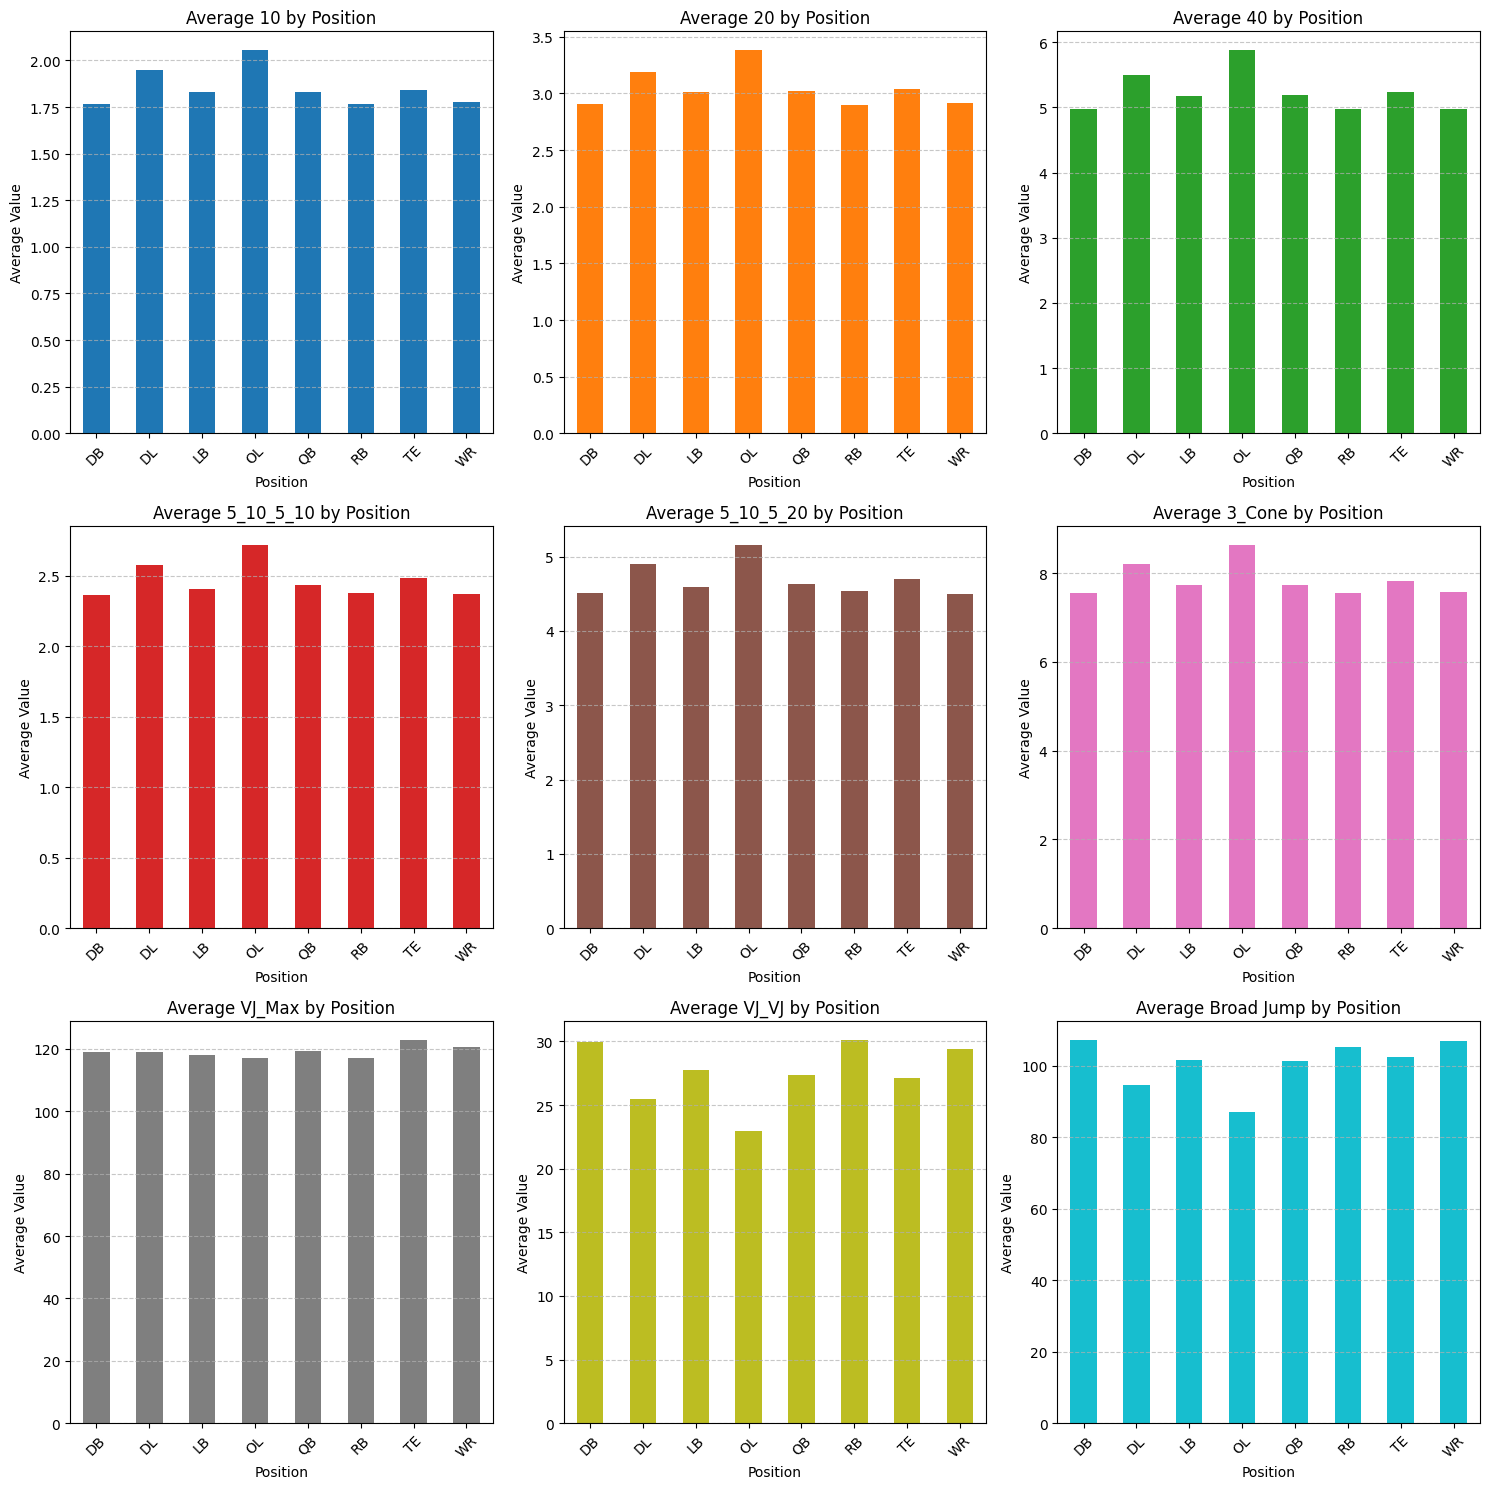

In [840]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average for each unique position
numeric_columns_avg = combine.groupby('Position')[numeric_columns].mean()

# Determine grid dimensions
num_rows = 3
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Define a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(numeric_columns)))

# Plotting each numeric column in a separate subplot
for i, (column, color) in enumerate(zip(numeric_columns, colors)):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    numeric_columns_avg[[column]].plot(kind='bar', ax=ax, legend=False, color=color)
    ax.set_title(f'Average {column} by Position')
    ax.set_xlabel('Position')
    ax.set_ylabel('Average Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

In [776]:
from scipy.stats import ttest_ind

# Iterate over each unique position
for position in combine['Position'].unique():
    # Filter data for successful and unsuccessful players for the current position
    successful_players_pos = successful_players[successful_players['Position'] == position][numeric_columns].dropna()
    unsuccessful_players_pos = unsuccessful_players[unsuccessful_players['Position'] == position][numeric_columns].dropna()
    
    # Convert columns to numeric type and drop non-convertible values
    successful_players_pos = successful_players_pos.apply(pd.to_numeric, errors='coerce').dropna()
    unsuccessful_players_pos = unsuccessful_players_pos.apply(pd.to_numeric, errors='coerce').dropna()
    
    # Perform t-tests for each numeric column
    for column in numeric_columns:
        # Perform t-test
        t_stat, p_value = ttest_ind(successful_players_pos[column], unsuccessful_players_pos[column], equal_var=False)
        
        # Print results
        print(f"Position: {position}, Column: {column}")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        print("")
        
        # Check if the difference is statistically significant
        if p_value < 0.05:
            print("The difference is statistically significant.")
        else:
            print("The difference is not statistically significant.")
        print("\n")

Position: RB, Column: 10
T-statistic: -2.1928624423819585
P-value: 0.2630585440062003

The difference is not statistically significant.


Position: RB, Column: 20
T-statistic: -2.2231040785924296
P-value: 0.25656397598508274

The difference is not statistically significant.


Position: RB, Column: 40
T-statistic: -3.357223822674161
P-value: 0.17587309372264812

The difference is not statistically significant.


Position: RB, Column: 5_10_5_10
T-statistic: -7.431336659751841
P-value: 0.050599330138459415

The difference is not statistically significant.


Position: RB, Column: 5_10_5_20
T-statistic: -2.430778109820688
P-value: 0.24183547925920487

The difference is not statistically significant.


Position: RB, Column: 3_Cone
T-statistic: -1.950548379791371
P-value: 0.28900885867090936

The difference is not statistically significant.


Position: RB, Column: VJ_Max
T-statistic: -0.6920950601221605
P-value: 0.6141999508746439

The difference is not statistically significant.


Position: 

/Users/alexpugh/anaconda3/envs/stat3255/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/alexpugh/anaconda3/envs/stat3255/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/alexpugh/anaconda3/envs/stat3255/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/alexpugh/anaconda3/envs/stat3255/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [777]:
data = {
    'Position': ['RB', 'OL', 'DL', 'TE', 'LB', 'WR', 'QB', 'DB'],
    '10': ['Not Significant', 'Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Significant', 'Not Significant', 'Significant'],
    '20': ['Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Significant'],
    '40': ['Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Significant'],
    '5_10_5_10': ['Not Significant', 'Not Significant', 'Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Significant'],
    '5_10_5_20': ['Not Significant', 'Not Significant', 'Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Significant'],
    '3_Cone': ['Not Significant', 'Not Significant', 'Not Significant', 'N/A', 'Not Significant', 'Significant', 'Not Significant', 'Significant'],
    'VJ_Max': ['Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'N/A', 'Significant', 'Not Significant', 'Significant'],
    'VJ_VJ': ['Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Significant', 'Not Significant', 'Significant'],
    'Broad Jump': ['Not Significant', 'Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Significant', 'Not Significant', 'Significant']
}


/var/folders/8b/vnb3p0z124j87t4bjjq_4j300000gn/T/ipykernel_32832/2950168200.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapped = df.replace(colors)


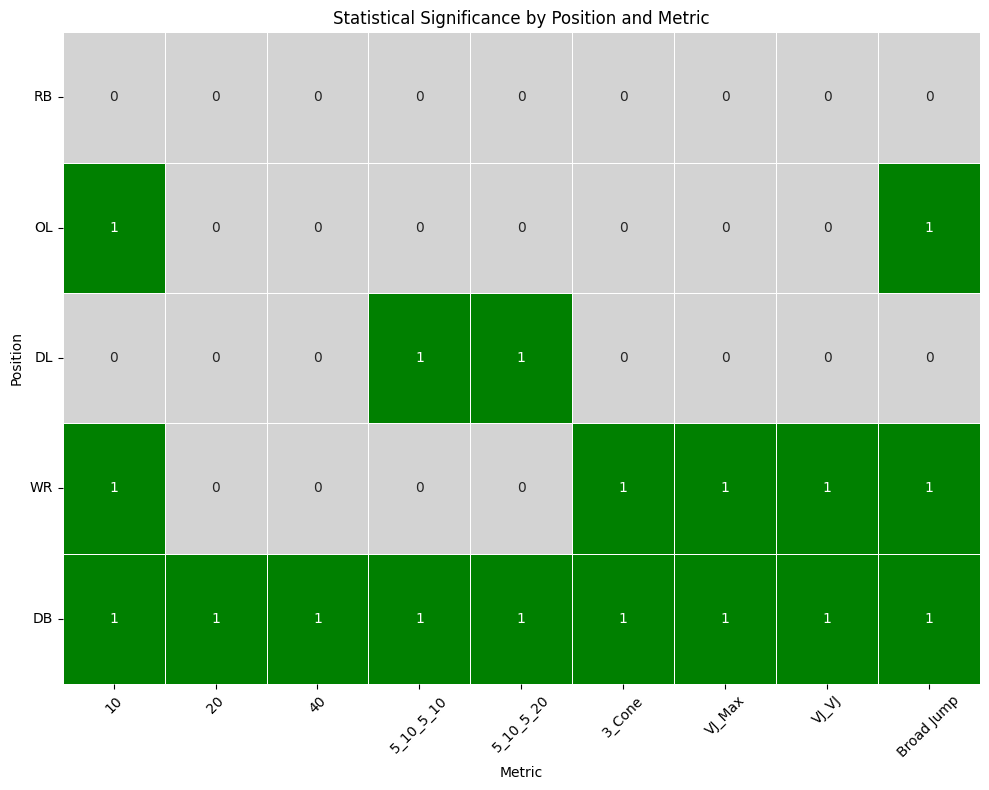

In [799]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data dictionary
data = {
    'Position': ['RB', 'OL', 'DL', 'WR', 'DB'],
    '10': ['Not Significant', 'Significant', 'Not Significant', 'Significant', 'Significant'],
    '20': ['Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Significant'],
    '40': ['Not Significant', 'Not Significant', 'Not Significant', 'Not Significant', 'Significant'],
    '5_10_5_10': ['Not Significant', 'Not Significant', 'Significant', 'Not Significant', 'Significant'],
    '5_10_5_20': ['Not Significant', 'Not Significant', 'Significant', 'Not Significant', 'Significant'],
    '3_Cone': ['Not Significant', 'Not Significant', 'Not Significant', 'Significant', 'Significant'],
    'VJ_Max': ['Not Significant', 'Not Significant', 'Not Significant', 'Significant', 'Significant'],
    'VJ_VJ': ['Not Significant', 'Not Significant', 'Not Significant', 'Significant', 'Significant'],
    'Broad Jump': ['Not Significant', 'Significant', 'Not Significant', 'Significant', 'Significant']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set Position column as index
df.set_index('Position', inplace=True)

# Define colors for the heatmap
colors = {'Significant': 1, 'Not Significant': 0, 'N/A': np.nan}

# Map colors to DataFrame
df_mapped = df.replace(colors)

# Create heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_mapped, cmap=['lightgrey', 'green'], annot=True, cbar=False, linewidths=0.5)
plt.title('Statistical Significance by Position and Metric')
plt.xlabel('Metric')
plt.ylabel('Position')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

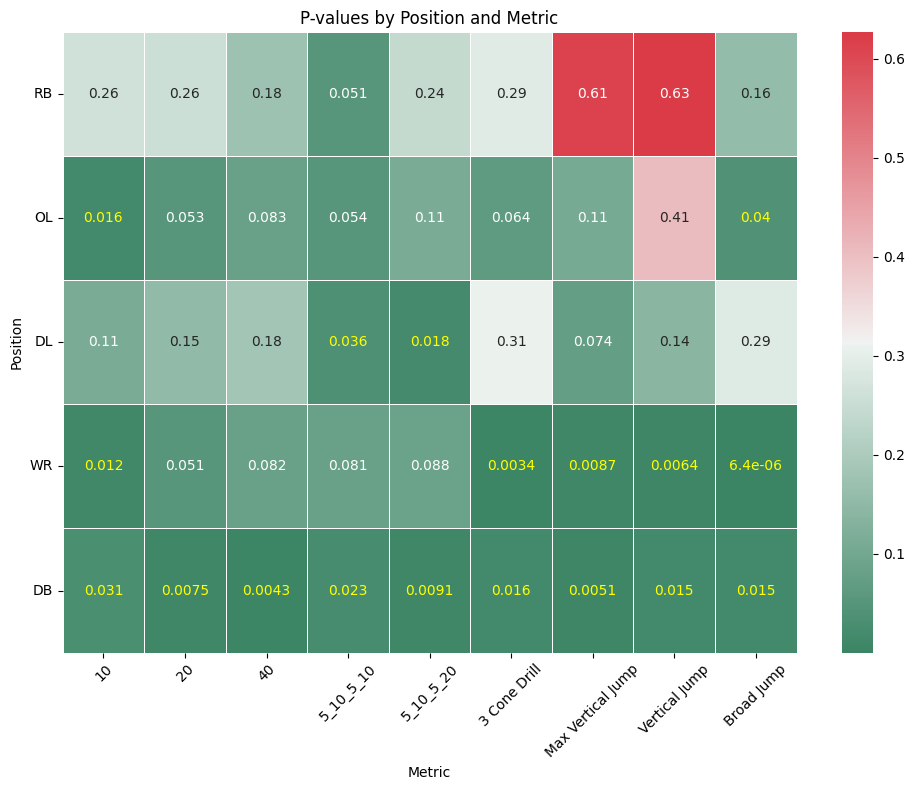

In [822]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data dictionary
data = {
    'Position': ['RB', 'OL', 'DL', 'WR', 'DB'],
    '10': [0.263058544, 0.015908057, 0.112437563, 0.011776909, 0.031190147],
    '20': [0.256563976, 0.053341917, 0.153893937, 0.050846528, 0.007506925],
    '40': [0.175873094, 0.082631773, 0.183316958, 0.081739617, 0.004294826],
    '5_10_5_10': [0.05059933, 0.053562364, 0.035655229, 0.081064974, 0.023101482],
    '5_10_5_20': [0.241835479, 0.110190885, 0.018160605, 0.087525887, 0.009063921],
    '3 Cone Drill': [0.289008859, 0.063712041, 0.310293884, 0.003414336, 0.015756057],
    'Max Vertical Jump': [0.614199951, 0.105957498, 0.074106854, 0.008727837, 0.005073257],
    'Vertical Jump': [0.626614448, 0.405807566, 0.137799545, 0.006410804, 0.014728847],
    'Broad Jump': [0.156670964, 0.039524933, 0.28772801, 6.44E-06, 0.01517466]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set Position column as index
df.set_index('Position', inplace=True)

# Create custom colormap going from red to green
cmap = sns.diverging_palette(150, 10, as_cmap=True)

# Create heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df, cmap=cmap, annot=True, cbar=True, linewidths=0.5)

# Highlight values below 0.05 in darker green color
for text in heatmap.texts:
    value = float(text.get_text())
    if value < 0.05:
        text.set_color('Yellow')

plt.title('P-values by Position and Metric')
plt.xlabel('Metric')
plt.ylabel('Position')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()